In [90]:
from PIL import Image
import math

# Step 1: Convert character to 8-bit hieroglyphics representation
def char_to_hieroglyphics_8bit(char):
    hieroglyphics_map = {
        'a': '00000001', 'b': '00000010', 'c': '00000011', 'd': '00000100', 'e': '00000101',
        'f': '00000110', 'g': '00000111', 'h': '00001000', 'i': '00001001', 'j': '00001010',
        'k': '00001011', 'l': '00001100', 'm': '00001101', 'n': '00001110', 'o': '00001111',
        'p': '00010000', 'q': '00010001', 'r': '00010010', 's': '00010011', 't': '00010100',
        'u': '00010101', 'v': '00010110', 'w': '00010111', 'x': '00011000', 'y': '00011001',
        'z': '00011010', ' ': '00100000'  # Adding space for clarity
    }
    return hieroglyphics_map.get(char.lower(), '00000000')

# Step 2: Convert character to 8-bit Braille representation
def char_to_braille_8bit(char):
    braille_map = {
        'a': '000000', 'b': '000001', 'c': '000010', 'd': '000011', 'e': '000100',
        'f': '000101', 'g': '000110', 'h': '000111', 'i': '001000', 'j': '001001',
        'k': '001010', 'l': '001011', 'm': '001100', 'n': '001101', 'o': '001110',
        'p': '001111', 'q': '010000', 'r': '010001', 's': '010010', 't': '010011',
        'u': '010100', 'v': '010101', 'w': '010110', 'x': '010111', 'y': '011000',
        'z': '011001', ' ': '011010'  # Adding space for clarity
    }
    return braille_map.get(char.lower(), '000000')

# Step 3: Encode data into image using LSB steganography (last 2 bits)
def encode_image_last2bits(image_path, binary_data):
    img = Image.open(image_path)
    pixels = img.load()
    width, height = img.size
    data_index = 0
    for y in range(height):
        for x in range(width):
            r, g, b = pixels[x, y]
            if data_index < len(binary_data):
                if data_index % 2 == 0:
                    new_r = (r & 0b11111100) | int(binary_data[data_index:data_index+8], 2)
                    pixels[x, y] = (new_r, g, b)
                else:
                    new_g = (g & 0b11111100) | int(binary_data[data_index:data_index+6], 2)
                    pixels[x, y] = (r, new_g, b)
                data_index += 8 if data_index % 2 == 0 else 6
            if data_index >= len(binary_data):
                break
        if data_index >= len(binary_data):
            break
    encoded_image_path = "/content/5786_encoded.jpg"  # Specify your output image path
    img.save(encoded_image_path)
    return encoded_image_path

# Step 4: Perform columnar transposition on binary data
def columnar_transposition(binary_data, key):
    num_columns = len(key)
    num_rows = math.ceil(len(binary_data) / num_columns)

    # Pad binary_data with zeros if necessary
    padded_data = binary_data.ljust(num_rows * num_columns, '0')

    # Create the transposed matrix
    transposed_matrix = []
    for i in range(num_columns):
        start = i * num_rows
        end = start + num_rows
        transposed_matrix.append(padded_data[start:end])

    # Arrange columns according to the key
    sorted_columns = [transposed_matrix[key.index(i)] for i in range(num_columns)]

    # Join columns to get the transposed binary data
    transposed_binary_data = ''.join(sorted_columns)
    return transposed_binary_data

# Step 5: Comprehensive encryption function with columnar transposition
def encrypt_text_to_image(plaintext, image_path, transposition_key):
    combined_binary_data = ''
    for i in range(len(plaintext)):
        if i % 2 == 0:
            combined_binary_data += char_to_hieroglyphics_8bit(plaintext[i])
        else:
            combined_binary_data += char_to_braille_8bit(plaintext[i])

    transposed_binary_data = columnar_transposition(combined_binary_data, transposition_key)

    encoded_image_path = encode_image_last2bits(image_path, transposed_binary_data)
    return encoded_image_path

# Example usage:
plaintext = "hello all this is aayushi in front of you all standing to present her project her novel approach of ahbt"
image_path = "/content/5786.jpg"
transposition_key = [2, 1, 0]  # Example key for columnar transposition
encoded_image_path = encrypt_text_to_image(plaintext, image_path, transposition_key)
print("Image with encoded data saved at:", encoded_image_path)


Image with encoded data saved at: /content/5786_encoded.jpg


In [91]:
from PIL import Image
import math

# Reverse maps for decoding
hieroglyphics_map_reverse = {
    '00000001': 'a', '00000010': 'b', '00000011': 'c', '00000100': 'd', '00000101': 'e',
    '00000110': 'f', '00000111': 'g', '00001000': 'h', '00001001': 'i', '00001010': 'j',
    '00001011': 'k', '00001100': 'l', '00001101': 'm', '00001110': 'n', '00001111': 'o',
    '00010000': 'p', '00010001': 'q', '00010010': 'r', '00010011': 's', '00010100': 't',
    '00010101': 'u', '00010110': 'v', '00010111': 'w', '00011000': 'x', '00011001': 'y',
    '00011010': 'z', '00100000': ' '  # Adding space for clarity
}

braille_map_reverse = {
    '000000': 'a', '000001': 'b', '000010': 'c', '000011': 'd', '000100': 'e',
    '000101': 'f', '000110': 'g', '000111': 'h', '001000': 'i', '001001': 'j',
    '001010': 'k', '001011': 'l', '001100': 'm', '001101': 'n', '001110': 'o',
    '001111': 'p', '010000': 'q', '010001': 'r', '010010': 's', '010011': 't',
    '010100': 'u', '010101': 'v', '010110': 'w', '010111': 'x', '011000': 'y',
    '011001': 'z', '011010': ' '  # Adding space for clarity
}

# Step 1: Decode data from image using LSB steganography (last 2 bits)
def decode_image_last2bits(encoded_image_path):
    img = Image.open(encoded_image_path)
    pixels = img.load()
    width, height = img.size
    binary_data = ''
    for y in range(height):
        for x in range(width):
            r, g, b = pixels[x, y]
            if len(binary_data) % 2 == 0:
                binary_data += format(r & 0b11, '02b')
            if len(binary_data) % 2 == 0:
                binary_data += format(g & 0b11, '02b')
            if len(binary_data) % 2 == 0:
                binary_data += format(b & 0b11, '02b')
            if len(binary_data) >= 8 and (binary_data[-8:] in hieroglyphics_map_reverse or binary_data[-6:] in braille_map_reverse):
                break
        if len(binary_data) >= 8 and (binary_data[-8:] in hieroglyphics_map_reverse or binary_data[-6:] in braille_map_reverse):
            break
    return binary_data

# Step 2: Reverse columnar transposition
def reverse_columnar_transposition(binary_data, key):
    num_columns = len(key)
    num_rows = math.ceil(len(binary_data) / num_columns)

    # Create an empty matrix to store transposed data
    transposed_matrix = [''] * num_columns

    # Calculate number of filled cells in last column
    filled_cells_last_col = len(binary_data) % num_columns

    # Fill matrix column-wise according to the key
    idx = 0
    for col in key:
        if col < filled_cells_last_col:
            transposed_matrix[col] = binary_data[idx : idx + num_rows]
            idx += num_rows
        else:
            transposed_matrix[col] = binary_data[idx : idx + num_rows - 1]
            idx += num_rows - 1

    # Reconstruct the transposed binary data
    reconstructed_binary_data = ''.join([transposed_matrix[i][j] for j in range(num_rows) for i in range(num_columns) if j < len(transposed_matrix[i])])

    return reconstructed_binary_data

# Step 3: Comprehensive decryption function
def decrypt_image_to_text(encoded_image_path, transposition_key):
    binary_data = decode_image_last2bits(encoded_image_path)
    reversed_binary_data = reverse_columnar_transposition(binary_data, transposition_key)

    plaintext = ''
    i = 0
    while i < len(reversed_binary_data):
        if i % 2 == 0:
            plaintext += hieroglyphics_map_reverse.get(reversed_binary_data[i:i+8], '')
            i += 8
        else:
            plaintext += braille_map_reverse.get(reversed_binary_data[i:i+6], '')
            i += 6
    return plaintext.strip()

# Example usage:
encoded_image_path = "/content/5786_encoded.jpg"
transposition_key = [2, 1, 0]  # Example key used during encryption
Plaintext = decrypt_image_to_text(encoded_image_path, transposition_key)
print("Decrypted Text:", plaintext)


Decrypted Text: hello all this is aayushi in front of you all standing to present her project her novel approach of ahbt


In [ ]:
""" Key contribution of this paper:
1) use of hieroglyphics
2) use of braille
3) both of them alternated between letters
4) use of columnar transposition
5) 8 bit conversion of hieroglyphics and 6 bit conversion of braille
6) changing last 2 bits of r, g, b each for the image steganography """


""" I am taking plaintext, each alterante character i am converting to hieroglyphics and braille
representation and then convert the hieroglyphics characters to 8 bits and braille characters to 6 bits, all the binary text i take up and then do columnar trannsposition on it and hide the bits
wherein the last 2 bits of r, g, b each in a pixel i store the data, which means i store 6 bits data in the single pixel"""

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math

# Step 1: Convert character to 8-bit hieroglyphics representation
def char_to_hieroglyphics_8bit(char):
    hieroglyphics_map = {
        'a': '00000001', 'b': '00000010', 'c': '00000011', 'd': '00000100', 'e': '00000101',
        'f': '00000110', 'g': '00000111', 'h': '00001000', 'i': '00001001', 'j': '00001010',
        'k': '00001011', 'l': '00001100', 'm': '00001101', 'n': '00001110', 'o': '00001111',
        'p': '00010000', 'q': '00010001', 'r': '00010010', 's': '00010011', 't': '00010100',
        'u': '00010101', 'v': '00010110', 'w': '00010111', 'x': '00011000', 'y': '00011001',
        'z': '00011010', ' ': '00100000'  # Adding space for clarity
    }
    return hieroglyphics_map.get(char.lower(), '00000000')

# Step 2: Convert character to 8-bit Braille representation
def char_to_braille_8bit(char):
    braille_map = {
        'a': '000000', 'b': '000001', 'c': '000010', 'd': '000011', 'e': '000100',
        'f': '000101', 'g': '000110', 'h': '000111', 'i': '001000', 'j': '001001',
        'k': '001010', 'l': '001011', 'm': '001100', 'n': '001101', 'o': '001110',
        'p': '001111', 'q': '010000', 'r': '010001', 's': '010010', 't': '010011',
        'u': '010100', 'v': '010101', 'w': '010110', 'x': '010111', 'y': '011000',
        'z': '011001', ' ': '011010'  # Adding space for clarity
    }
    return braille_map.get(char.lower(), '000000')

# Step 3: Encode data into image using LSB steganography (last 2 bits)
def encode_image_last2bits(image_path, binary_data):
    img = Image.open(image_path)
    pixels = img.load()
    width, height = img.size
    data_index = 0
    for y in range(height):
        for x in range(width):
            r, g, b = pixels[x, y]
            if data_index < len(binary_data):
                if data_index % 2 == 0:
                    new_r = (r & 0b11111100) | int(binary_data[data_index:data_index+8], 2)
                    pixels[x, y] = (new_r, g, b)
                else:
                    new_g = (g & 0b11111100) | int(binary_data[data_index:data_index+6], 2)
                    pixels[x, y] = (r, new_g, b)
                data_index += 8 if data_index % 2 == 0 else 6
            if data_index >= len(binary_data):
                break
        if data_index >= len(binary_data):
            break
    encoded_image_path = "/content/5786_encoded.jpg"  # Specify your output image path
    img.save(encoded_image_path)
    return encoded_image_path

# Step 4: Perform columnar transposition on binary data
def columnar_transposition(binary_data, key):
    num_columns = len(key)
    num_rows = math.ceil(len(binary_data) / num_columns)

    # Pad binary_data with zeros if necessary
    padded_data = binary_data.ljust(num_rows * num_columns, '0')

    # Create the transposed matrix
    transposed_matrix = []
    for i in range(num_columns):
        start = i * num_rows
        end = start + num_rows
        transposed_matrix.append(padded_data[start:end])

    # Arrange columns according to the key
    sorted_columns = [transposed_matrix[key.index(i)] for i in range(num_columns)]

    # Join columns to get the transposed binary data
    transposed_binary_data = ''.join(sorted_columns)
    return transposed_binary_data

# Step 5: Comprehensive encryption function with columnar transposition
def encrypt_text_to_image(plaintext, image_path, transposition_key):
    combined_binary_data = ''
    for i in range(len(plaintext)):
        if i % 2 == 0:
            combined_binary_data += char_to_hieroglyphics_8bit(plaintext[i])
        else:
            combined_binary_data += char_to_braille_8bit(plaintext[i])

    transposed_binary_data = columnar_transposition(combined_binary_data, transposition_key)

    encoded_image_path = encode_image_last2bits(image_path, transposed_binary_data)
    return encoded_image_path

# Example usage:
plaintext = "hello all this is aayushi in front of you all"
image_path = "/content/5786.jpg"
transposition_key = [2, 1, 0]  # Example key for columnar transposition
encoded_image_path = encrypt_text_to_image(plaintext, image_path, transposition_key)
print("Image with encoded data saved at:", encoded_image_path)

# Histogram Analysis
def plot_histogram(image_array, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(image_array.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
    plt.title('Histogram of ' + title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    # Color channel histograms
    plt.subplot(1, 2, 2)
    plt.hist(image_array[:, :, 0].ravel(), bins=256, range=(0, 256), color='red', alpha=0.5, label='Red')
    plt.hist(image_array[:, :, 1].ravel(), bins=256, range=(0, 256), color='green', alpha=0.5, label='Green')
    plt.hist(image_array[:, :, 2].ravel(), bins=256, range=(0, 256), color='blue', alpha=0.5, label='Blue')
    plt.title('Color Channel Histograms of ' + title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()

# Pixel Intensity Comparison
def plot_pixel_intensity(original_array, steganographic_array):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(original_array[100, :, 0], label='Original Red', color='red')
    plt.plot(original_array[100, :, 1], label='Original Green', color='green')
    plt.plot(original_array[100, :, 2], label='Original Blue', color='blue')
    plt.title('Pixel Intensity Comparison - Original Image')
    plt.xlabel('Pixel Index')
    plt.ylabel('Intensity')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(steganographic_array[100, :, 0], label='Steganographic Red', color='red')
    plt.plot(steganographic_array[100, :, 1], label='Steganographic Green', color='green')
    plt.plot(steganographic_array[100, :, 2], label='Steganographic Blue', color='blue')
    plt.title('Pixel Intensity Comparison - Steganographic Image')
    plt.xlabel('Pixel Index')
    plt.ylabel('Intensity')
    plt.legend()

# Color Intensity Distribution Plot
def plot_color_intensity_distribution(image_array, title):
    plt.figure(figsize=(15, 5))
    for i, channel in enumerate(['Red', 'Green', 'Blue']):
        plt.subplot(1, 3, i+1)
        plt.hist(image_array[:, :, i].ravel(), bins=256, range=(0, 256), color=channel.lower(), alpha=0.7)
        plt.title(channel + ' Channel Distribution')
        plt.xlabel('Intensity')
        plt.ylabel('Frequency')

# Spatial Domain Analysis
def plot_spatial_domain(original_array, steganographic_array):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_array)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(steganographic_array)
    plt.title('Steganographic Image')

# Load original and steganographic images
original_img = Image.open(image_path)
steganographic_img = Image.open(encoded_image_path)

# Convert images to numpy arrays
original_array = np.array(original_img)
steganographic_array = np.array(steganographic_img)


Image with encoded data saved at: /content/5786_encoded.jpg


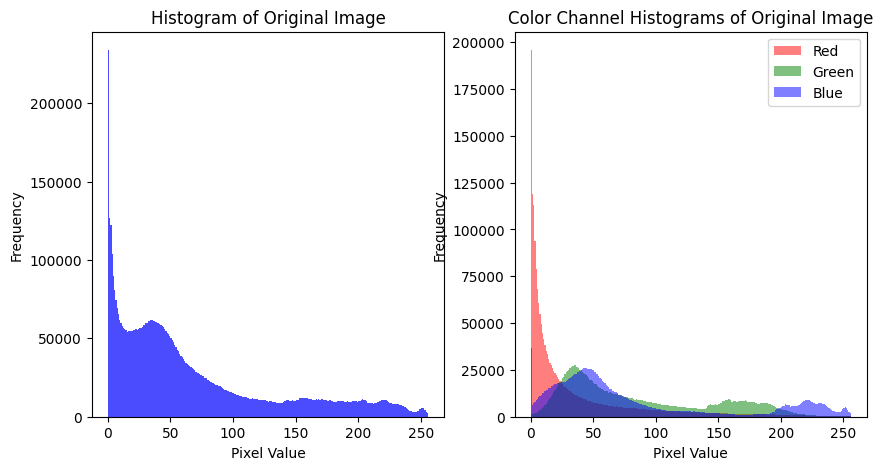

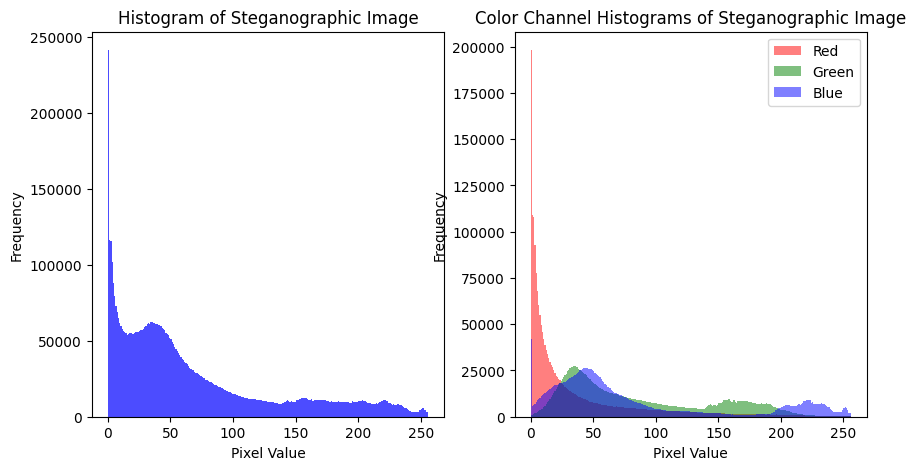

In [ ]:
plot_histogram(original_array, 'Original Image')
plot_histogram(steganographic_array, 'Steganographic Image')
plt.show()

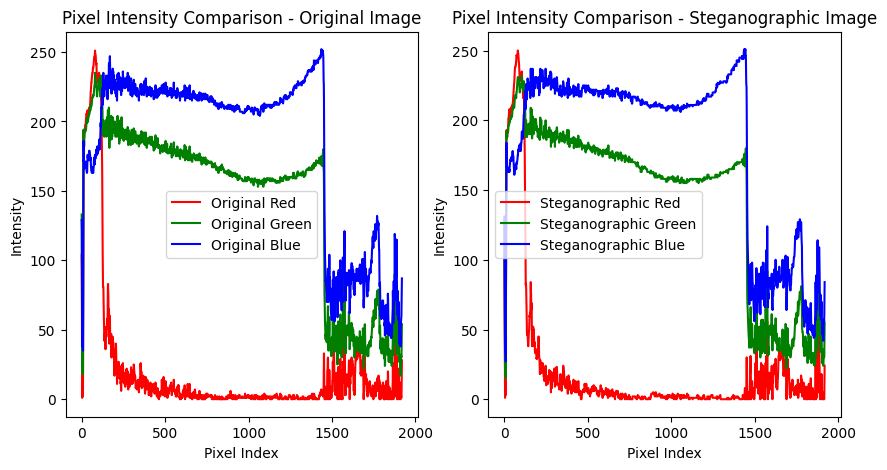

In [ ]:
plot_pixel_intensity(original_array, steganographic_array)
plt.show()

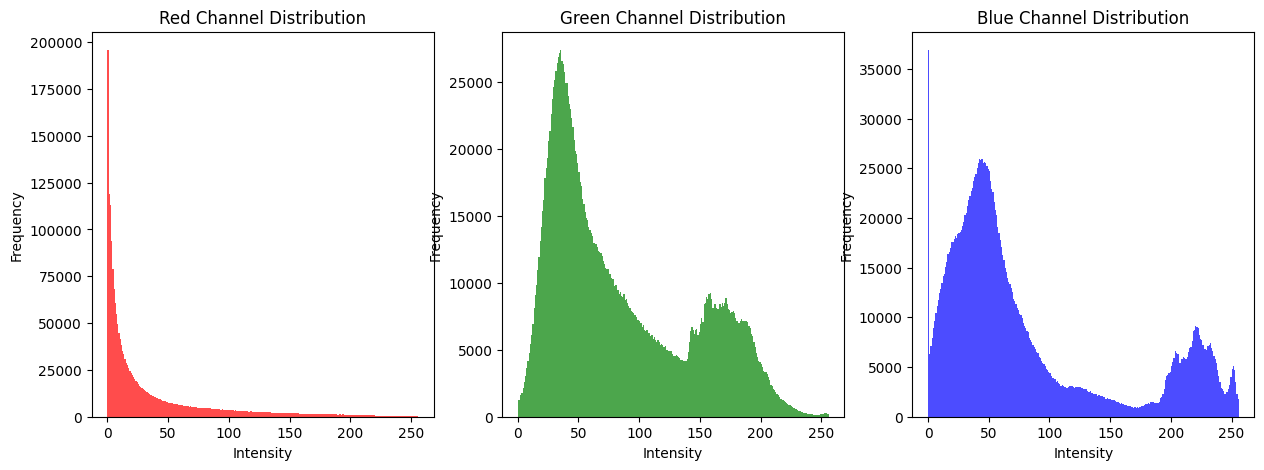

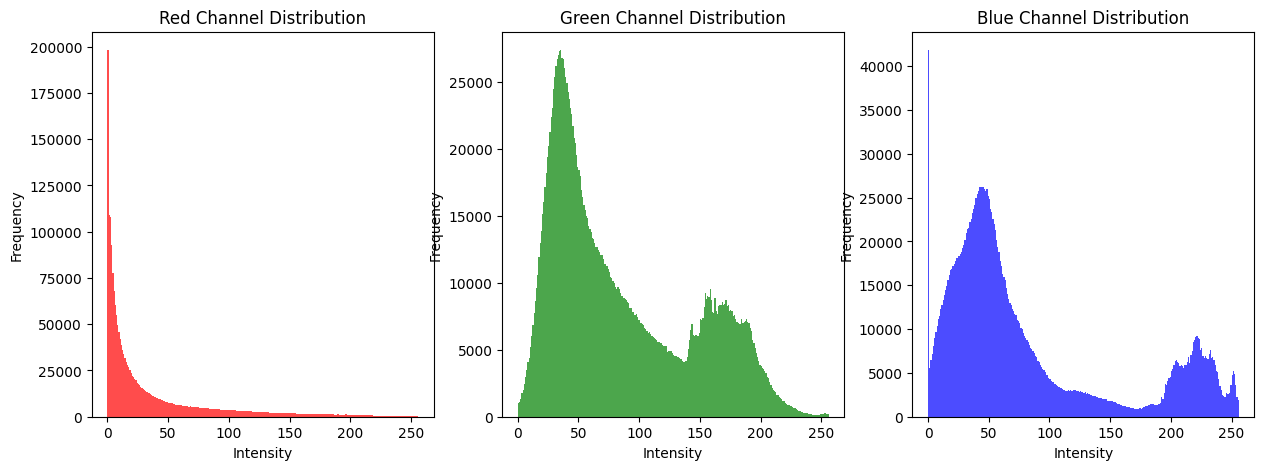

In [ ]:
plot_color_intensity_distribution(original_array, 'Original Image')
plot_color_intensity_distribution(steganographic_array, 'Steganographic Image')
plt.show()

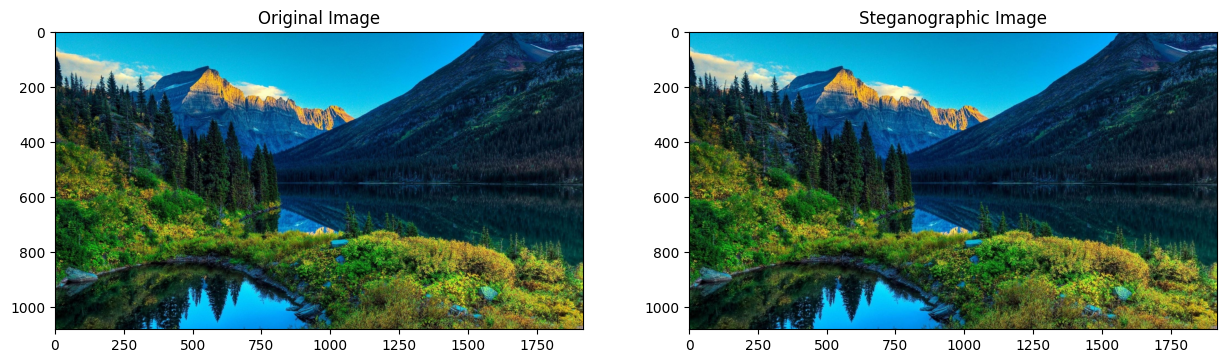

In [ ]:
plot_spatial_domain(original_array, steganographic_array)

plt.show()

Image with encoded data saved at: /content/5787_encoded.jpg


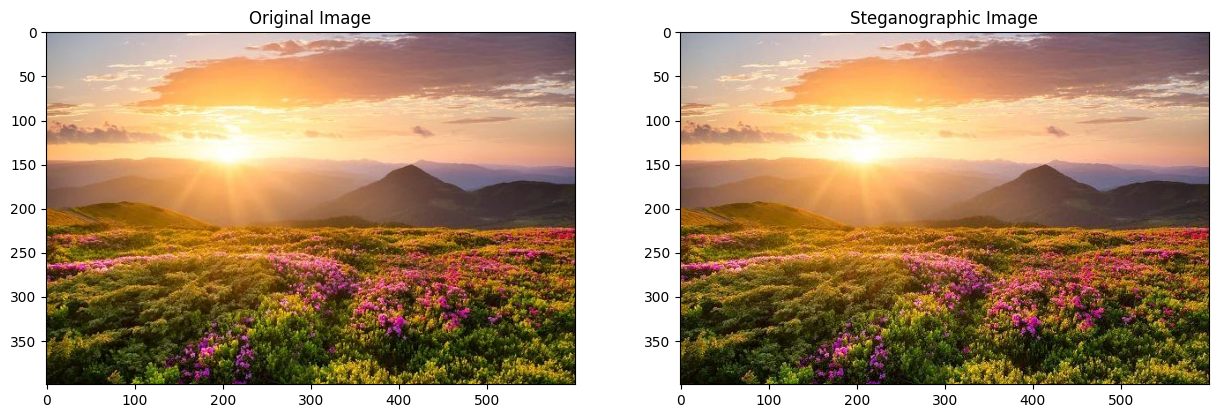

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math

# Step 1: Convert character to 8-bit hieroglyphics representation
def char_to_hieroglyphics_8bit(char):
    hieroglyphics_map = {
        'a': '00000001', 'b': '00000010', 'c': '00000011', 'd': '00000100', 'e': '00000101',
        'f': '00000110', 'g': '00000111', 'h': '00001000', 'i': '00001001', 'j': '00001010',
        'k': '00001011', 'l': '00001100', 'm': '00001101', 'n': '00001110', 'o': '00001111',
        'p': '00010000', 'q': '00010001', 'r': '00010010', 's': '00010011', 't': '00010100',
        'u': '00010101', 'v': '00010110', 'w': '00010111', 'x': '00011000', 'y': '00011001',
        'z': '00011010', ' ': '00100000'  # Adding space for clarity
    }
    return hieroglyphics_map.get(char.lower(), '00000000')

# Step 2: Convert character to 8-bit Braille representation
def char_to_braille_8bit(char):
    braille_map = {
        'a': '000000', 'b': '000001', 'c': '000010', 'd': '000011', 'e': '000100',
        'f': '000101', 'g': '000110', 'h': '000111', 'i': '001000', 'j': '001001',
        'k': '001010', 'l': '001011', 'm': '001100', 'n': '001101', 'o': '001110',
        'p': '001111', 'q': '010000', 'r': '010001', 's': '010010', 't': '010011',
        'u': '010100', 'v': '010101', 'w': '010110', 'x': '010111', 'y': '011000',
        'z': '011001', ' ': '011010'  # Adding space for clarity
    }
    return braille_map.get(char.lower(), '000000')

# Step 3: Encode data into image using LSB steganography (last 2 bits)
def encode_image_last2bits(image_path, binary_data):
    img = Image.open(image_path)
    pixels = img.load()
    width, height = img.size
    data_index = 0
    for y in range(height):
        for x in range(width):
            r, g, b = pixels[x, y]
            if data_index < len(binary_data):
                if data_index % 2 == 0:
                    new_r = (r & 0b11111100) | int(binary_data[data_index:data_index+8], 2)
                    pixels[x, y] = (new_r, g, b)
                else:
                    new_g = (g & 0b11111100) | int(binary_data[data_index:data_index+6], 2)
                    pixels[x, y] = (r, new_g, b)
                data_index += 8 if data_index % 2 == 0 else 6
            if data_index >= len(binary_data):
                break
        if data_index >= len(binary_data):
            break
    encoded_image_path = "/content/5787_encoded.jpg"  # Specify your output image path
    img.save(encoded_image_path)
    return encoded_image_path

# Step 4: Perform columnar transposition on binary data
def columnar_transposition(binary_data, key):
    num_columns = len(key)
    num_rows = math.ceil(len(binary_data) / num_columns)

    # Pad binary_data with zeros if necessary
    padded_data = binary_data.ljust(num_rows * num_columns, '0')

    # Create the transposed matrix
    transposed_matrix = []
    for i in range(num_columns):
        start = i * num_rows
        end = start + num_rows
        transposed_matrix.append(padded_data[start:end])

    # Arrange columns according to the key
    sorted_columns = [transposed_matrix[key.index(i)] for i in range(num_columns)]

    # Join columns to get the transposed binary data
    transposed_binary_data = ''.join(sorted_columns)
    return transposed_binary_data

# Step 5: Comprehensive encryption function with columnar transposition
def encrypt_text_to_image(plaintext, image_path, transposition_key):
    combined_binary_data = ''
    for i in range(len(plaintext)):
        if i % 2 == 0:
            combined_binary_data += char_to_hieroglyphics_8bit(plaintext[i])
        else:
            combined_binary_data += char_to_braille_8bit(plaintext[i])

    transposed_binary_data = columnar_transposition(combined_binary_data, transposition_key)

    encoded_image_path = encode_image_last2bits(image_path, transposed_binary_data)
    return encoded_image_path

# Example usage:
plaintext = "hello all this is aayushi in front of you all"
image_path = "/content/5787.jpg"
transposition_key = [2, 1, 0]  # Example key for columnar transposition
encoded_image_path = encrypt_text_to_image(plaintext, image_path, transposition_key)
print("Image with encoded data saved at:", encoded_image_path)

# Histogram Analysis
def plot_histogram(image_array, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(image_array.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
    plt.title('Histogram of ' + title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    # Color channel histograms
    plt.subplot(1, 2, 2)
    plt.hist(image_array[:, :, 0].ravel(), bins=256, range=(0, 256), color='red', alpha=0.5, label='Red')
    plt.hist(image_array[:, :, 1].ravel(), bins=256, range=(0, 256), color='green', alpha=0.5, label='Green')
    plt.hist(image_array[:, :, 2].ravel(), bins=256, range=(0, 256), color='blue', alpha=0.5, label='Blue')
    plt.title('Color Channel Histograms of ' + title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()

# Pixel Intensity Comparison
def plot_pixel_intensity(original_array, steganographic_array):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(original_array[100, :, 0], label='Original Red', color='red')
    plt.plot(original_array[100, :, 1], label='Original Green', color='green')
    plt.plot(original_array[100, :, 2], label='Original Blue', color='blue')
    plt.title('Pixel Intensity Comparison - Original Image')
    plt.xlabel('Pixel Index')
    plt.ylabel('Intensity')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(steganographic_array[100, :, 0], label='Steganographic Red', color='red')
    plt.plot(steganographic_array[100, :, 1], label='Steganographic Green', color='green')
    plt.plot(steganographic_array[100, :, 2], label='Steganographic Blue', color='blue')
    plt.title('Pixel Intensity Comparison - Steganographic Image')
    plt.xlabel('Pixel Index')
    plt.ylabel('Intensity')
    plt.legend()

# Color Intensity Distribution Plot
def plot_color_intensity_distribution(image_array, title):
    plt.figure(figsize=(15, 5))
    for i, channel in enumerate(['Red', 'Green', 'Blue']):
        plt.subplot(1, 3, i+1)
        plt.hist(image_array[:, :, i].ravel(), bins=256, range=(0, 256), color=channel.lower(), alpha=0.7)
        plt.title(channel + ' Channel Distribution')
        plt.xlabel('Intensity')
        plt.ylabel('Frequency')

# Spatial Domain Analysis
def plot_spatial_domain(original_array, steganographic_array):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_array)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(steganographic_array)
    plt.title('Steganographic Image')

# Load original and steganographic images
original_img = Image.open(image_path)
steganographic_img = Image.open(encoded_image_path)

# Convert images to numpy arrays
original_array = np.array(original_img)
steganographic_array = np.array(steganographic_img)
plot_spatial_domain(original_array, steganographic_array)

plt.show()

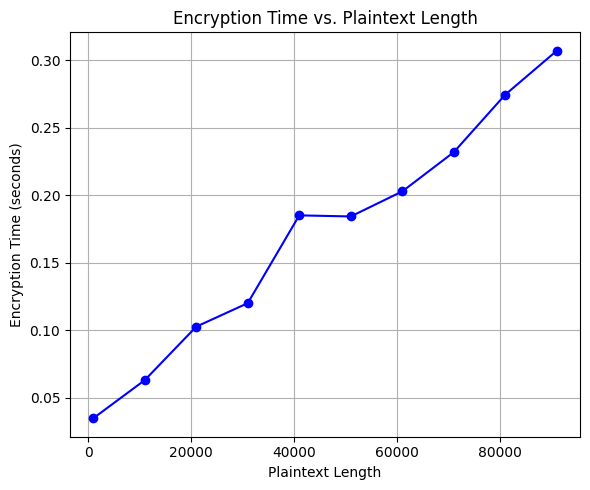

In [ ]:
from PIL import Image
import math
import time
import matplotlib.pyplot as plt

# Step 1: Convert character to 8-bit hieroglyphics representation
def char_to_hieroglyphics_8bit(char):
    hieroglyphics_map = {
        'a': '00000001', 'b': '00000010', 'c': '00000011', 'd': '00000100', 'e': '00000101',
        'f': '00000110', 'g': '00000111', 'h': '00001000', 'i': '00001001', 'j': '00001010',
        'k': '00001011', 'l': '00001100', 'm': '00001101', 'n': '00001110', 'o': '00001111',
        'p': '00010000', 'q': '00010001', 'r': '00010010', 's': '00010011', 't': '00010100',
        'u': '00010101', 'v': '00010110', 'w': '00010111', 'x': '00011000', 'y': '00011001',
        'z': '00011010', ' ': '00100000'  # Adding space for clarity
    }
    return hieroglyphics_map.get(char.lower(), '00000000')

# Step 2: Convert character to 8-bit Braille representation
def char_to_braille_8bit(char):
    braille_map = {
        'a': '000000', 'b': '000001', 'c': '000010', 'd': '000011', 'e': '000100',
        'f': '000101', 'g': '000110', 'h': '000111', 'i': '001000', 'j': '001001',
        'k': '001010', 'l': '001011', 'm': '001100', 'n': '001101', 'o': '001110',
        'p': '001111', 'q': '010000', 'r': '010001', 's': '010010', 't': '010011',
        'u': '010100', 'v': '010101', 'w': '010110', 'x': '010111', 'y': '011000',
        'z': '011001', ' ': '011010'  # Adding space for clarity
    }
    return braille_map.get(char.lower(), '000000')

# Step 3: Encode data into image using LSB steganography (last 2 bits)
def encode_image_last2bits(image_path, binary_data):
    img = Image.open(image_path)
    pixels = img.load()
    width, height = img.size
    data_index = 0
    for y in range(height):
        for x in range(width):
            r, g, b = pixels[x, y]
            if data_index < len(binary_data):
                if data_index % 2 == 0:
                    new_r = (r & 0b11111100) | int(binary_data[data_index:data_index+8], 2)
                    pixels[x, y] = (new_r, g, b)
                else:
                    new_g = (g & 0b11111100) | int(binary_data[data_index:data_index+6], 2)
                    pixels[x, y] = (r, new_g, b)
                data_index += 8 if data_index % 2 == 0 else 6
            if data_index >= len(binary_data):
                break
        if data_index >= len(binary_data):
            break
    encoded_image_path = "/content/5786_encoded.jpg"  # Specify your output image path
    img.save(encoded_image_path)
    return encoded_image_path

# Step 4: Perform columnar transposition on binary data
def columnar_transposition(binary_data, key):
    num_columns = len(key)
    num_rows = math.ceil(len(binary_data) / num_columns)

    # Pad binary_data with zeros if necessary
    padded_data = binary_data.ljust(num_rows * num_columns, '0')

    # Create the transposed matrix
    transposed_matrix = []
    for i in range(num_columns):
        start = i * num_rows
        end = start + num_rows
        transposed_matrix.append(padded_data[start:end])

    # Arrange columns according to the key
    sorted_columns = [transposed_matrix[key.index(i)] for i in range(num_columns)]

    # Join columns to get the transposed binary data
    transposed_binary_data = ''.join(sorted_columns)
    return transposed_binary_data

# Step 5: Comprehensive encryption function with columnar transposition
def encrypt_text_to_image(plaintext, image_path, transposition_key):
    combined_binary_data = ''
    for i in range(len(plaintext)):
        if i % 2 == 0:
            combined_binary_data += char_to_hieroglyphics_8bit(plaintext[i])
        else:
            combined_binary_data += char_to_braille_8bit(plaintext[i])

    transposed_binary_data = columnar_transposition(combined_binary_data, transposition_key)

    encoded_image_path = encode_image_last2bits(image_path, transposed_binary_data)
    return encoded_image_path

# Function to measure encryption time for varying plaintext lengths
def measure_encryption_time(min_length, max_length, step_size, image_path, transposition_key):
    plaintext_lengths = []
    encryption_times = []

    for length in range(min_length, max_length + 1, step_size):
        plaintext = 'a' * length  # Generate plaintext of current length
        start_time = time.time()
        encrypt_text_to_image(plaintext, image_path, transposition_key)
        end_time = time.time()
        encryption_time = end_time - start_time

        plaintext_lengths.append(length)
        encryption_times.append(encryption_time)
    return plaintext_lengths, encryption_times

# Example usage:
min_length = 1000
max_length = 100000
step_size = 10000
image_path = "/content/5786.jpg"
transposition_key = [2, 1, 0]  # Example key for columnar transposition

plaintext_lengths, encryption_times = measure_encryption_time(min_length, max_length, step_size, image_path, transposition_key)

# Plotting
plt.figure(figsize=(6, 5))
plt.plot(plaintext_lengths, encryption_times, marker='o', linestyle='-', color='b')
plt.title('Encryption Time vs. Plaintext Length')
plt.xlabel('Plaintext Length')
plt.ylabel('Encryption Time (seconds)')
plt.grid(True)
plt.tight_layout()
plt.show()


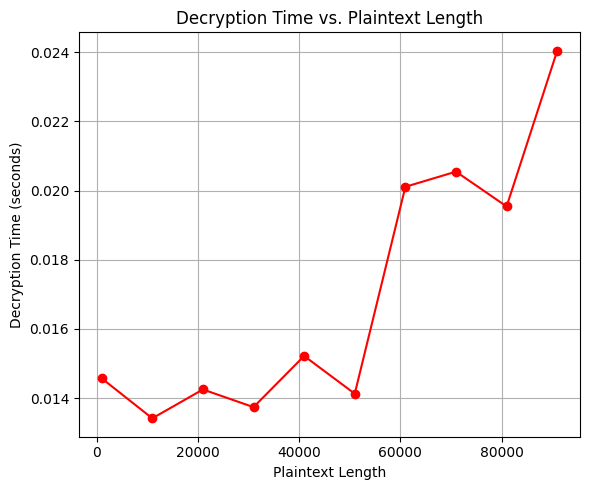

In [ ]:
from PIL import Image
import math
import time
import matplotlib.pyplot as plt

# Reverse maps for decoding
hieroglyphics_map_reverse = {
    '00000001': 'a', '00000010': 'b', '00000011': 'c', '00000100': 'd', '00000101': 'e',
    '00000110': 'f', '00000111': 'g', '00001000': 'h', '00001001': 'i', '00001010': 'j',
    '00001011': 'k', '00001100': 'l', '00001101': 'm', '00001110': 'n', '00001111': 'o',
    '00010000': 'p', '00010001': 'q', '00010010': 'r', '00010011': 's', '00010100': 't',
    '00010101': 'u', '00010110': 'v', '00010111': 'w', '00011000': 'x', '00011001': 'y',
    '00011010': 'z', '00100000': ' '  # Adding space for clarity
}

braille_map_reverse = {
    '000000': 'a', '000001': 'b', '000010': 'c', '000011': 'd', '000100': 'e',
    '000101': 'f', '000110': 'g', '000111': 'h', '001000': 'i', '001001': 'j',
    '001010': 'k', '001011': 'l', '001100': 'm', '001101': 'n', '001110': 'o',
    '001111': 'p', '010000': 'q', '010001': 'r', '010010': 's', '010011': 't',
    '010100': 'u', '010101': 'v', '010110': 'w', '010111': 'x', '011000': 'y',
    '011001': 'z', '011010': ' '  # Adding space for clarity
}

# Step 1: Decode data from image using LSB steganography (last 2 bits)
def decode_image_last2bits(encoded_image_path):
    img = Image.open(encoded_image_path)
    pixels = img.load()
    width, height = img.size
    binary_data = ''
    for y in range(height):
        for x in range(width):
            r, g, b = pixels[x, y]
            if len(binary_data) % 2 == 0:
                binary_data += format(r & 0b11, '02b')
            if len(binary_data) % 2 == 0:
                binary_data += format(g & 0b11, '02b')
            if len(binary_data) % 2 == 0:
                binary_data += format(b & 0b11, '02b')
            if len(binary_data) >= 8 and (binary_data[-8:] in hieroglyphics_map_reverse or binary_data[-6:] in braille_map_reverse):
                break
        if len(binary_data) >= 8 and (binary_data[-8:] in hieroglyphics_map_reverse or binary_data[-6:] in braille_map_reverse):
            break
    return binary_data

# Step 2: Reverse columnar transposition
def reverse_columnar_transposition(binary_data, key):
    num_columns = len(key)
    num_rows = math.ceil(len(binary_data) / num_columns)

    # Create an empty matrix to store transposed data
    transposed_matrix = [''] * num_columns

    # Calculate number of filled cells in last column
    filled_cells_last_col = len(binary_data) % num_columns

    # Fill matrix column-wise according to the key
    idx = 0
    for col in key:
        if col < filled_cells_last_col:
            transposed_matrix[col] = binary_data[idx : idx + num_rows]
            idx += num_rows
        else:
            transposed_matrix[col] = binary_data[idx : idx + num_rows - 1]
            idx += num_rows - 1

    # Reconstruct the transposed binary data
    reconstructed_binary_data = ''.join([transposed_matrix[i][j] for j in range(num_rows) for i in range(num_columns) if j < len(transposed_matrix[i])])

    return reconstructed_binary_data

# Step 3: Comprehensive decryption function
def decrypt_image_to_text(encoded_image_path, transposition_key):
    binary_data = decode_image_last2bits(encoded_image_path)
    reversed_binary_data = reverse_columnar_transposition(binary_data, transposition_key)

    plaintext = ''
    i = 0
    while i < len(reversed_binary_data):
        if i % 2 == 0:
            plaintext += hieroglyphics_map_reverse.get(reversed_binary_data[i:i+8], '')
            i += 8
        else:
            plaintext += braille_map_reverse.get(reversed_binary_data[i:i+6], '')
            i += 6

    return plaintext.strip()

# Function to measure decryption time for varying encoded image sizes
def measure_decryption_time(min_length, max_length, step_size, image_path, transposition_key):
    decryption_times = []

    for length in range(min_length, max_length + 1, step_size):
        plaintext = 'a' * length  # Generating plaintext of specified length
        encoded_image_path = encrypt_text_to_image(plaintext, image_path, transposition_key)  # Encrypt and get encoded image path

        start_time = time.time()
        decrypt_image_to_text(encoded_image_path, transposition_key)
        end_time = time.time()

        decryption_time = end_time - start_time
        decryption_times.append(decryption_time)
    return list(range(min_length, max_length + 1, step_size)), decryption_times

# Example usage:
min_length = 1000
max_length = 100000
step_size = 10000
image_path = "/content/5786_encoded.jpg"  # Use the path of the previously encoded image
transposition_key = [2, 1, 0]  # Example key used during encryption

plaintext_lengths, decryption_times = measure_decryption_time(min_length, max_length, step_size, image_path, transposition_key)

# Plotting
plt.figure(figsize=(6, 5))
plt.plot(plaintext_lengths, decryption_times, marker='o', linestyle='-', color='r')
plt.title('Decryption Time vs. Plaintext Length')
plt.xlabel('Plaintext Length')
plt.ylabel('Decryption Time (seconds)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [93]:
import cv2
import numpy as np
import math


# Novel Approach AHBT


def calculate_psnr(original_image_path, encoded_image_path):
    original = cv2.imread(original_image_path)
    encoded = cv2.imread(encoded_image_path)
    mse = np.mean(((original - encoded)**2))
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 40 * math.log10(max_pixel / math.sqrt(mse))
    return psnr

original_image_path = "/content/5786.jpg"
encoded_image_path = "/content/5786_encoded.jpg"
psnr = calculate_psnr(original_image_path, encoded_image_path)
print(f"PSNR: {psnr:.5f} dB")


PSNR: 64.23790 dB


In [94]:
from skimage.metrics import structural_similarity as ssim

def calculate_ssim(original_image_path, encoded_image_path):
    original = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
    encoded = cv2.imread(encoded_image_path, cv2.IMREAD_GRAYSCALE)
    score, _ = ssim(original, encoded, full=True)
    return score


original_image_path = "/content/5786.jpg"
encoded_image_path = "/content/5786_encoded.jpg"
ssim_value = calculate_ssim(original_image_path, encoded_image_path)
print(f"SSIM: {ssim_value:.5f}")


SSIM: 0.95437


In [98]:
import cv2

def calculate_payload_capacity(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    height, width, _ = img.shape
    # Assuming each pixel can hide 6 bits of data (2 bits per color channel)
    capacity_bits = height * width * 6
    return capacity_bits

original_image_path = "/content/5786.jpg"
payload_capacity = calculate_payload_capacity(original_image_path)
print(f"Payload Capacity: {payload_capacity} bits")


Payload Capacity: 12441600 bits


In [99]:
import random

def introduce_noise(image_path, noise_level=0.01):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    noisy_img = img.copy()
    num_noisy_pixels = int(noise_level * img.size)
    for _ in range(num_noisy_pixels):
        x = random.randint(0, img.shape[1] - 1)
        y = random.randint(0, img.shape[0] - 1)
        noisy_img[y, x] = [random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)]
    noisy_image_path = "/content/5786_encoded.jpg"  # Specify your noisy image output path
    cv2.imwrite(noisy_image_path, noisy_img)
    return noisy_image_path

# Introduce noise into the encoded image
noisy_image_path = introduce_noise(encoded_image_path)

# Measure error rate
def calculate_error_rate(original_text, decoded_text):
    errors = sum(1 for o, d in zip(original_text, decoded_text) if o != d)
    error_rate = errors / len(original_text)
    return error_rate

decoded_text_noisy = decrypt_image_to_text(noisy_image_path, transposition_key)
error_rate = calculate_error_rate(plaintext, decoded_text_noisy)
print(f"Error Rate: {error_rate:.4f}")


Error Rate: 0.0000


In [100]:
from PIL import Image

def encode_image(image_path, data, output_path):
    # Load image
    img = Image.open(image_path)
    pixels = img.load()

    # Convert data to binary
    data_binary = ''.join(format(ord(char), '08b') for char in data)
    data_len = len(data_binary)

    # Add a delimiter to signify the end of the data
    data_binary += '1111111111111110'  # End delimiter

    data_index = 0

    for y in range(img.height):
        for x in range(img.width):
            if data_index < len(data_binary):
                r, g, b = pixels[x, y]
                # Modify the least significant bit of the red channel
                r = (r & 0xFE) | int(data_binary[data_index])
                data_index += 1
                if data_index < len(data_binary):
                    # Modify the least significant bit of the green channel
                    g = (g & 0xFE) | int(data_binary[data_index])
                    data_index += 1
                    if data_index < len(data_binary):
                        # Modify the least significant bit of the blue channel
                        b = (b & 0xFE) | int(data_binary[data_index])
                        data_index += 1
                pixels[x, y] = (r, g, b)
            else:
                break

    img.save(output_path)
    print(f"Data embedded into image and saved as {output_path}")

# Example usage
image_path = "/content/5787.jpg"
data = "Hello, this is a secret message."
output_path = "/content/5787_encoded.jpg"
encode_image(image_path, data, output_path)


Data embedded into image and saved as /content/5787_encoded.jpg


In [104]:
import cv2
import numpy as np

def calculate_psnr(original_image_path, stego_image_path):
    original = cv2.imread(original_image_path)
    stego = cv2.imread(stego_image_path)
    mse = np.mean((original - stego) ** 2)
    if mse == 0:
        return float('inf')
    psnr = 30 * np.log10(255.0 / np.sqrt(mse))
    return psnr

original_image_path = "/content/5787.jpg"
stego_image_path = "/content/5787_encoded.jpg"
psnr_value = calculate_psnr(original_image_path, stego_image_path)
print("PSNR:", psnr_value)


PSNR: 46.33184094079758


In [105]:
from skimage.metrics import structural_similarity as ssim
import cv2

def calculate_ssim(original_image_path, stego_image_path):
    original = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
    stego = cv2.imread(stego_image_path, cv2.IMREAD_GRAYSCALE)
    ssim_value, _ = ssim(original, stego, full=True)
    return ssim_value

original_image_path = "/content/5787.jpg"
stego_image_path = "/content/5787_encoded.jpg"
ssim_value = calculate_ssim(original_image_path, stego_image_path)
print("SSIM:", ssim_value)


SSIM: 0.9074398288720786


In [106]:
def calculate_payload_capacity(image_path, bits_per_pixel=2):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    height, width, _ = img.shape
    total_pixels = height * width
    payload_capacity = total_pixels * bits_per_pixel
    return payload_capacity

payload_capacity = calculate_payload_capacity(original_image_path)
print("Payload Capacity:", payload_capacity, "bits")


Payload Capacity: 4147200 bits


In [107]:
import random

def introduce_noise(image_path, noise_level=0.01):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    noisy_img = img.copy()
    num_noisy_pixels = int(noise_level * img.size)
    for _ in range(num_noisy_pixels):
        x = random.randint(0, img.shape[1] - 1)
        y = random.randint(0, img.shape[0] - 1)
        noisy_img[y, x] = [random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)]
    noisy_image_path = "/content/5787_encoded.jpg"  # Specify your noisy image output path
    cv2.imwrite(noisy_image_path, noisy_img)
    return noisy_image_path

# Introduce noise into the encoded image
noisy_image_path = introduce_noise(encoded_image_path)

# Measure error rate
def calculate_error_rate(original_text, decoded_text):
    errors = sum(1 for o, d in zip(original_text, decoded_text) if o != d)
    error_rate = errors / len(original_text)
    return error_rate

decoded_text_noisy = decrypt_image_to_text(noisy_image_path, transposition_key)
error_rate = calculate_error_rate(plaintext, decoded_text_noisy)
print(f"Error Rate: {error_rate:.4f}")

Error Rate: 0.0000
